# Prediction using Decision Tree Algorithm

# Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import plot_tree
from pandas.plotting import scatter_matrix

# Importing Data

In [24]:
iris=pd.read_csv('C:\\Users\\Parth Salke\\Downloads\\Datasets\\Iris.csv')
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.shape

(150, 6)

In [10]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.Species.value_counts()  

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

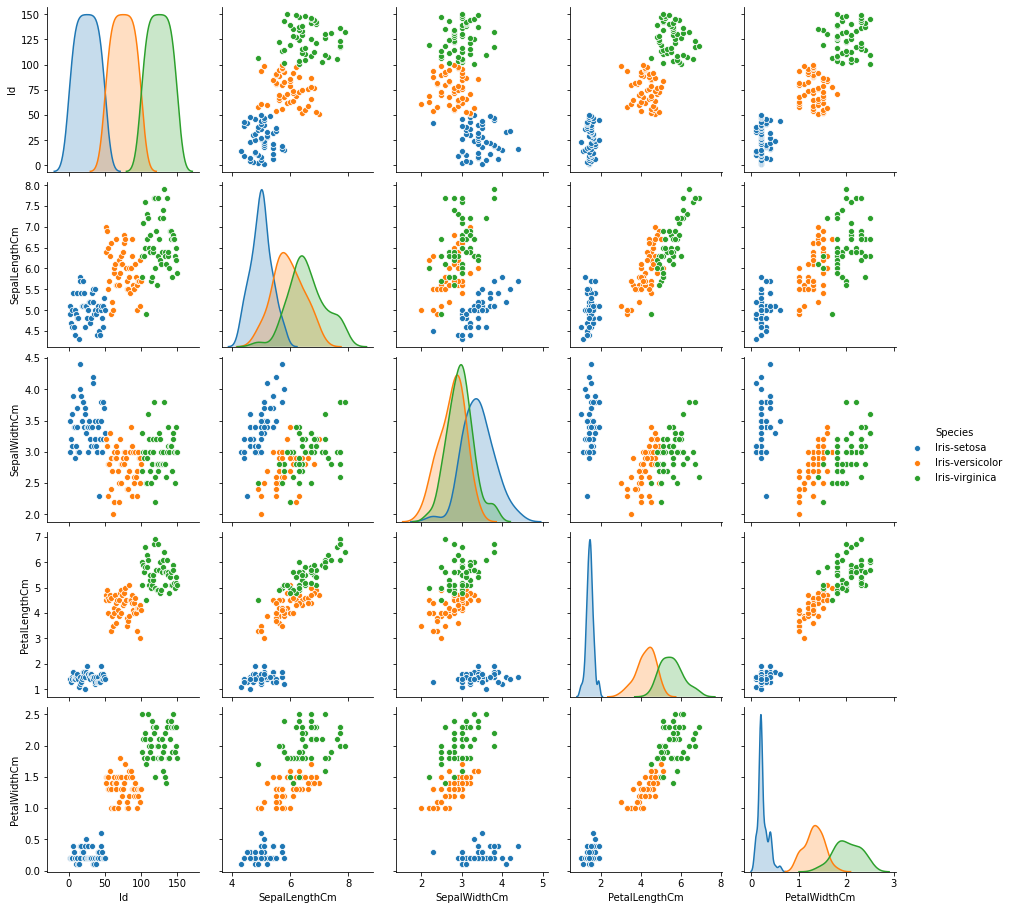

In [15]:
sns.pairplot(data=iris,hue='Species')

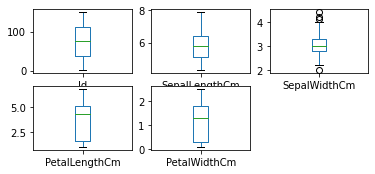

In [17]:
iris.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

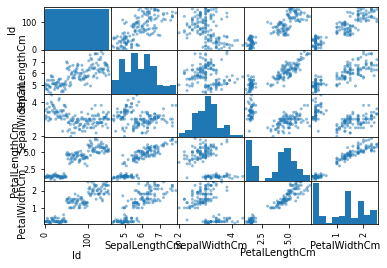

In [25]:
scatter_matrix(iris)
plt.show()

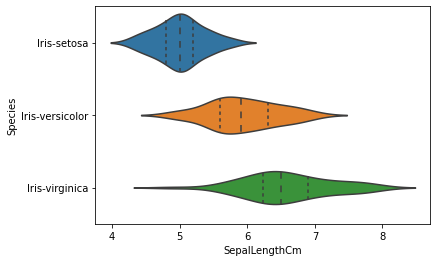

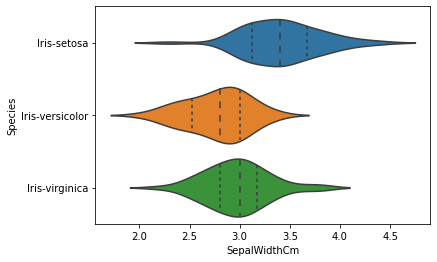

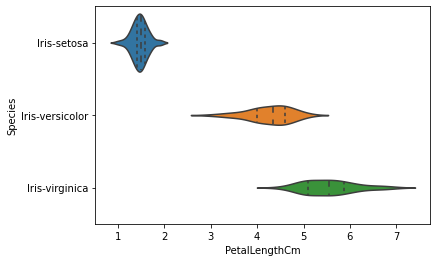

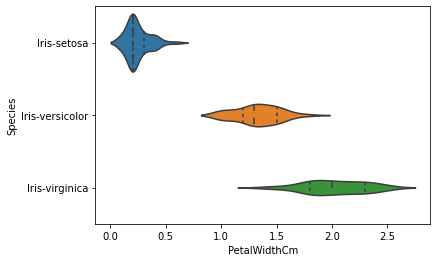

In [26]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

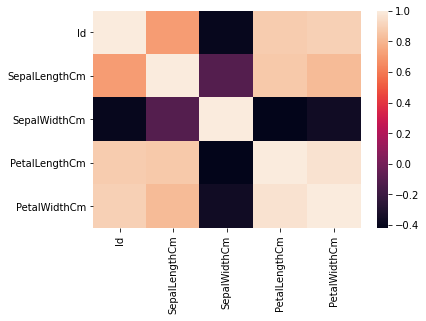

In [9]:
sns.heatmap(iris.corr())

In [11]:
target=iris['Species']
df1=iris.copy()
df1=df1.drop('Species',axis=1)

In [12]:
X=df1

In [13]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target=le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
y=target

# Train and Testing Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


# Accuracy

In [18]:
from sklearn.metrics import classification_report
y_pred=dtree.predict(X_test)
print('Classification report-\n',classification_report(y_test,y_pred))

Classification report-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Tree Diagram

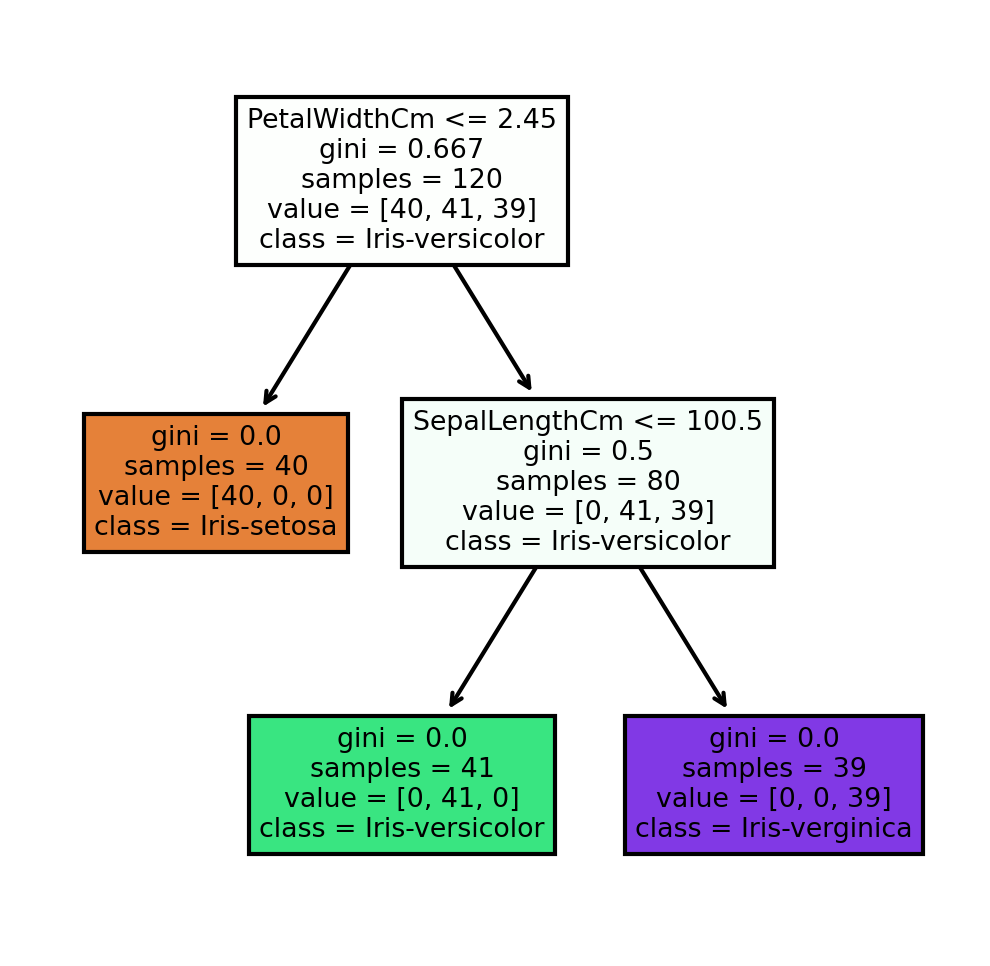

In [19]:
from sklearn import tree
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-setosa','Iris-versicolor','Iris-verginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dtree, feature_names=fn, class_names=cn, filled=True);
fig.savefig('imagename.png')

In [20]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 1.0000
